# Tarea - Ejercicio Covid19 - MINSA

# Casos positivos por COVID-19 - [Ministerio de Salud - MINSA]

<div style="text-align: right">
Pablo Londoñe Bailon </font><br>

Para la Practicas se basara en los casos positivos por COVID-19 registrados hasta la actualidad, tomando como referencia los datos compartidos por la plataforma datosabiertos.gob.pe.


Ubicación y enlace:

Casos Positivos:
https://www.datosabiertos.gob.pe/dataset/casos-positivos-por-covid-19-ministerio-de-salud-minsa

Fallecidos:
https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa

Fuente referencial tomada del día:

Positivos:

https://www.datosabiertos.gob.pe/dataset/casos-positivos-por-covid-19-ministerio-de-salud-minsa/resource/690e57a6-a465-47d8-86fd


Fallecidos:

https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa/resource/4b7636f3-5f0c-4404-8526


### CASOS POSITIVOS

| NOMBRE DEL CAMPO  | Tipo  	| Descripción del campo   	|
|-----------------  |----------	|-------------------------	|
| UUID            	| String 	| Código de Persona       	|
| DEPARTAMENTO    	| String 	| Nombre del departamento 	|
| PROVINCIA       	| String 	| Nombre de la provincia  	|
| DISTRITO        	| String 	| Nombre del Distrito     	|
| METODODX        	| String 	| Metodo de Muestreo      	|
| EDAD            	| String 	| Edad de la Persona      	|
| SEXO            	| String 	| Sexo de la Persona      	|
| FECHA_RESULTADO 	| String 	| Fecha del resultado     	|


### FALLECIDOS

| NOMBRE DEL CAMPO  	| Tipo  	| Descripción del campo   	|
|-----------------------|----------	|-------------------------	|
| UUID					| String 	| Código de Persona       	|
| FECHA_FALLECIMIENTO   | String 	| Fecha del Fallecimiento 	|
| EDAD_DECLARADA       	| String 	| Edad del Fallecido  		|
| SEXO        			| String 	| Sexo de la Persona     	|
| FECHA_NAC        		| String 	| Fecha de nacimiento      	|
| DEPARTAMENTO          | String 	| Nombre del departamento   |
| PROVINCIA 			| String 	| Nombre de la provincia  	|
| DISTRITO				| String 	| Nombre del Distrito     	|

In [124]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df_pos= pd.read_csv('positivos_covid.csv', encoding='ISO-8859-1')
df_pos

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,4/05/2020
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,1/05/2020
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,30/04/2020
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,16/05/2020
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2/05/2020
...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,17/05/2020
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,18/05/2020
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,16/05/2020
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,19/05/2020


In [127]:
df_fall= pd.read_csv('fallecidos_covid.csv', encoding='ISO-8859-1')
df_fall

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a291428b3f0f74997a60fcd837d43519,22/04/2020,72,MASCULINO,7/05/1947,LIMA,CAÑETE,NUEVO IMPERIAL
1,bea9970bcea5a648e970aa9896d6b763,25/04/2020,60,FEMENINO,29/05/1959,LIMA,CAÑETE,SAN VICENTE DE CAÑETE
2,7c7970dccf5f0ec92543c9fd5a01fde9,3/05/2020,73,FEMENINO,3/08/1946,LIMA,HUAURA,SANTA MARIA
3,ff4c117718021a7fe79eb45b5462e543,3/05/2020,52,MASCULINO,10/07/1967,LIMA,CAÑETE,MALA
4,f7284d7cf0ab559b2f8165e7dca41098,23/04/2020,50,MASCULINO,29/03/1970,AREQUIPA,AREQUIPA,PAUCARPATA
...,...,...,...,...,...,...,...,...
12412,80aaa7a9fdc3f2af3f847228107b15da,14/07/2020,62,MASCULINO,26/04/1958,SAN MARTIN,PICOTA,PUCACACA
12413,ed496abc2b875f8479ef7237310d4726,14/07/2020,79,MASCULINO,18/05/1941,SAN MARTIN,SAN MARTIN,CACATACHI
12414,9d1af0ec694a9a6084106e182f5b211f,14/07/2020,89,FEMENINO,31/01/1931,HUANUCO,AMBO,SAN RAFAEL
12415,89159b21e09b0df87510a8b71c0d0fe0,14/07/2020,89,FEMENINO,13/11/1930,TUMBES,TUMBES,SAN JACINTO


In [128]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337724 entries, 0 to 337723
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UUID             337724 non-null  object 
 1   DEPARTAMENTO     337724 non-null  object 
 2   PROVINCIA        337724 non-null  object 
 3   DISTRITO         337724 non-null  object 
 4   METODODX         337724 non-null  object 
 5   EDAD             336148 non-null  float64
 6   SEXO             334940 non-null  object 
 7   FECHA_RESULTADO  336415 non-null  object 
dtypes: float64(1), object(7)
memory usage: 20.6+ MB


In [129]:
df_fall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12417 entries, 0 to 12416
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UUID                 12417 non-null  object
 1   FECHA_FALLECIMIENTO  12417 non-null  object
 2   EDAD_DECLARADA       12417 non-null  int64 
 3   SEXO                 12417 non-null  object
 4   FECHA_NAC            11630 non-null  object
 5   DEPARTAMENTO         12417 non-null  object
 6   PROVINCIA            11079 non-null  object
 7   DISTRITO             11612 non-null  object
dtypes: int64(1), object(7)
memory usage: 776.2+ KB


### 1. Cantidad de casos positivos, para el mes de Junio total acumulado

In [130]:
df_pos['FECHA_RESULTADO']=pd.to_datetime(df_pos['FECHA_RESULTADO'])
df_pos.dtypes

UUID                       object
DEPARTAMENTO               object
PROVINCIA                  object
DISTRITO                   object
METODODX                   object
EDAD                      float64
SEXO                       object
FECHA_RESULTADO    datetime64[ns]
dtype: object

In [131]:
df_pos['FECHA_RESULTADOS'] = df_pos['FECHA_RESULTADO']
df_posX=df_pos.drop("FECHA_RESULTADO", axis=1)
df_posX

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05
...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19


In [132]:
df_posX1 =df_posX.dropna(how='any')
df_posX1

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05
...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19


In [133]:
df_posX1['FECHA_RESULTADOS']=pd.to_datetime(df_posX1['FECHA_RESULTADOS'])
df_posX1.dtypes

UUID                        object
DEPARTAMENTO                object
PROVINCIA                   object
DISTRITO                    object
METODODX                    object
EDAD                       float64
SEXO                        object
FECHA_RESULTADOS    datetime64[ns]
dtype: object

In [134]:
df_posX1['FECHA_RESULTADOS']

0        2020-04-05
1        2020-01-05
2        2020-04-30
3        2020-05-16
4        2020-02-05
            ...    
337719   2020-05-17
337720   2020-05-18
337721   2020-05-16
337722   2020-05-19
337723   2020-03-05
Name: FECHA_RESULTADOS, Length: 334585, dtype: datetime64[ns]

In [135]:
tiem= (df_posX1['FECHA_RESULTADOS']>= '2020-06-01') & (df_posX1['FECHA_RESULTADOS']<= '2020-06-30')
df_posX1.loc[tiem]

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADOS
8,c405f4dfa0905e02b65be51b5d80bf63,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,42.0,MASCULINO,2020-06-05
28,1fb8db0414782f97559f10c8ce3099dd,LIMA,LIMA,SAN JUAN DE MIRAFLORES,PCR,69.0,FEMENINO,2020-06-05
36,8939545c5b35e3ada9703282cfd1cd14,CALLAO,CALLAO,BELLAVISTA,PCR,52.0,MASCULINO,2020-06-05
50,77103af1bd1491f994a6b9cd410668f1,CALLAO,CALLAO,BELLAVISTA,PCR,54.0,FEMENINO,2020-06-05
53,4765edd55c0eab6365356e50e70313e1,CALLAO,CALLAO,BELLAVISTA,PCR,33.0,MASCULINO,2020-06-05
...,...,...,...,...,...,...,...,...
332853,c775e081c613bc8dbf6cb1570d3961d9,LIMA,LIMA,SAN LUIS,PR,6.0,MASCULINO,2020-06-06
332854,692adce09bf01135003baa5da878dea8,LIMA,LIMA,COMAS,PR,5.0,MASCULINO,2020-06-06
332855,94fb763b632acad9d5f1b1d297f256ed,LIMA,LIMA,SANTIAGO DE SURCO,PR,9.0,MASCULINO,2020-06-06
332856,1e317fa5097e73f60f4c6f699b936a47,LIMA,LIMA,EL AGUSTINO,PR,8.0,MASCULINO,2020-06-06


In [136]:
tiem.sum()

73758

Primero se eliminaron todos los datos NaN y NaT. Durante el mes de junio se tiene 73758 casos positivos de COVID19 en el Perú.

### 2. Cantidad de casos positivos, por Distritos, de la provincia Callao  

In [137]:
df_dis=df_posX[{'PROVINCIA','DISTRITO'}]
df_dis

,PROVINCIA,DISTRITO
0,LIMA,VILLA MARIA DEL TRIUNFO
1,CANTA,SANTA ROSA DE QUIVES
2,LIMA,ATE
3,SANTA,NUEVO CHIMBOTE
4,LIMA,SURQUILLO
...,...,...
337719,LIMA,VILLA EL SALVADOR
337720,LIMA,EL AGUSTINO
337721,LIMA,SAN JUAN DE LURIGANCHO
337722,LIMA,SAN MARTIN DE PORRES


In [138]:
df_Call=df_dis[df_dis['PROVINCIA']=='CALLAO']
df_Call

,PROVINCIA,DISTRITO
5,CALLAO,BELLAVISTA
6,CALLAO,BELLAVISTA
10,CALLAO,BELLAVISTA
13,CALLAO,BELLAVISTA
16,CALLAO,BELLAVISTA
...,...,...
337671,CALLAO,VENTANILLA
337672,CALLAO,CALLAO
337673,CALLAO,CALLAO
337674,CALLAO,VENTANILLA


In [139]:
df_Call1=df_Call.groupby('DISTRITO').count()
df_Call1

,PROVINCIA
DISTRITO,
BELLAVISTA,3852
CALLAO,10514
LA PERLA,506
LA PUNTA,33
MI PERU,396
VENTANILLA,3003


Los casos positivos enlos distritos del Callao son:
BELLAVISTA=3852 
CALLAO=10514
LA PERLA=506
LA PUNTA=33
MI PERU=396
VENTANILLA=3003

### 3. La Media, Minimo y Maximo de la Edad, por Distritos, y Sexo de la Provincia de Nazca, de Casos Positivos


In [140]:
df_pos1=df_pos.dropna()
df_pos1

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05,2020-02-05
...,...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19,2020-05-19


In [141]:
df_pos2 = df_pos1.drop(df_pos1[df_pos1['EDAD']==0].index)
df_pos2

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05,2020-02-05
...,...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19,2020-05-19


In [142]:
df_EDS=df_pos2[{'PROVINCIA','DISTRITO', 'EDAD', 'SEXO'}]
df_Naz=df_EDS[df_EDS['PROVINCIA']=='NAZCA']
df_Naz

,EDAD,PROVINCIA,SEXO,DISTRITO
981,34.0,NAZCA,MASCULINO,NAZCA
1361,54.0,NAZCA,FEMENINO,VISTA ALEGRE
1365,32.0,NAZCA,FEMENINO,VISTA ALEGRE
1373,28.0,NAZCA,MASCULINO,VISTA ALEGRE
1675,26.0,NAZCA,MASCULINO,MARCONA
...,...,...,...,...
334382,64.0,NAZCA,FEMENINO,VISTA ALEGRE
336633,46.0,NAZCA,MASCULINO,NAZCA
336955,49.0,NAZCA,MASCULINO,EL INGENIO
337135,50.0,NAZCA,MASCULINO,VISTA ALEGRE


In [143]:
df_Naz0=df_Naz[df_Naz['SEXO']=='MASCULINO']
df_Naz0

,EDAD,PROVINCIA,SEXO,DISTRITO
981,34.0,NAZCA,MASCULINO,NAZCA
1373,28.0,NAZCA,MASCULINO,VISTA ALEGRE
1675,26.0,NAZCA,MASCULINO,MARCONA
1735,9.0,NAZCA,MASCULINO,NAZCA
1739,86.0,NAZCA,MASCULINO,NAZCA
...,...,...,...,...
332275,79.0,NAZCA,MASCULINO,NAZCA
336633,46.0,NAZCA,MASCULINO,NAZCA
336955,49.0,NAZCA,MASCULINO,EL INGENIO
337135,50.0,NAZCA,MASCULINO,VISTA ALEGRE


In [144]:
df_chan=df_Naz0.groupby('DISTRITO').count()
df_chan

,EDAD,PROVINCIA,SEXO
DISTRITO,,,
CHANGUILLO,5,5,5
EL INGENIO,3,3,3
MARCONA,137,137,137
NAZCA,205,205,205
VISTA ALEGRE,109,109,109


In [145]:
df_Naz1=df_Naz0[df_Naz0['DISTRITO']=='CHANGUILLO']
df_Naz1

,EDAD,PROVINCIA,SEXO,DISTRITO
126875,55.0,NAZCA,MASCULINO,CHANGUILLO
236487,51.0,NAZCA,MASCULINO,CHANGUILLO
236488,51.0,NAZCA,MASCULINO,CHANGUILLO
294036,38.0,NAZCA,MASCULINO,CHANGUILLO
298102,72.0,NAZCA,MASCULINO,CHANGUILLO


In [146]:
df_Naz1['EDAD'].describe()

count     5.000000
mean     53.400000
std      12.218838
min      38.000000
25%      51.000000
50%      51.000000
75%      55.000000
max      72.000000
Name: EDAD, dtype: float64

In [147]:
df_Naz2=df_Naz0[df_Naz0['DISTRITO']=='EL INGENIO']
df_Naz2

,EDAD,PROVINCIA,SEXO,DISTRITO
130020,35.0,NAZCA,MASCULINO,EL INGENIO
149642,72.0,NAZCA,MASCULINO,EL INGENIO
336955,49.0,NAZCA,MASCULINO,EL INGENIO


In [25]:
df_Naz2['EDAD'].describe()

count     3.000000
mean     52.000000
std      18.681542
min      35.000000
25%      42.000000
50%      49.000000
75%      60.500000
max      72.000000
Name: EDAD, dtype: float64

In [26]:
df_Naz3=df_Naz0[df_Naz0['DISTRITO']=='MARCONA']
df_Naz3

,EDAD,PROVINCIA,SEXO,DISTRITO
1675,26.0,NAZCA,MASCULINO,MARCONA
2008,20.0,NAZCA,MASCULINO,MARCONA
2680,41.0,NAZCA,MASCULINO,MARCONA
8810,37.0,NAZCA,MASCULINO,MARCONA
19537,65.0,NAZCA,MASCULINO,MARCONA
...,...,...,...,...
306565,27.0,NAZCA,MASCULINO,MARCONA
306978,33.0,NAZCA,MASCULINO,MARCONA
307932,29.0,NAZCA,MASCULINO,MARCONA
318217,45.0,NAZCA,MASCULINO,MARCONA


In [27]:
df_Naz3['EDAD'].describe()

count    137.000000
mean      38.204380
std       15.003009
min        3.000000
25%       27.000000
50%       37.000000
75%       49.000000
max       72.000000
Name: EDAD, dtype: float64

In [28]:
df_Naz4=df_Naz0[df_Naz0['DISTRITO']=='NAZCA']
df_Naz4

,EDAD,PROVINCIA,SEXO,DISTRITO
981,34.0,NAZCA,MASCULINO,NAZCA
1735,9.0,NAZCA,MASCULINO,NAZCA
1739,86.0,NAZCA,MASCULINO,NAZCA
2012,45.0,NAZCA,MASCULINO,NAZCA
2266,18.0,NAZCA,MASCULINO,NAZCA
...,...,...,...,...
316515,42.0,NAZCA,MASCULINO,NAZCA
331538,64.0,NAZCA,MASCULINO,NAZCA
332275,79.0,NAZCA,MASCULINO,NAZCA
336633,46.0,NAZCA,MASCULINO,NAZCA


In [29]:
df_Naz4['EDAD'].describe()

count    205.000000
mean      38.751220
std       17.450253
min        2.000000
25%       27.000000
50%       37.000000
75%       50.000000
max       93.000000
Name: EDAD, dtype: float64

In [30]:
df_Naz5=df_Naz0[df_Naz0['DISTRITO']=='VISTA ALEGRE']
df_Naz5

,EDAD,PROVINCIA,SEXO,DISTRITO
1373,28.0,NAZCA,MASCULINO,VISTA ALEGRE
1764,50.0,NAZCA,MASCULINO,VISTA ALEGRE
9567,28.0,NAZCA,MASCULINO,VISTA ALEGRE
9583,8.0,NAZCA,MASCULINO,VISTA ALEGRE
26892,12.0,NAZCA,MASCULINO,VISTA ALEGRE
...,...,...,...,...
318565,35.0,NAZCA,MASCULINO,VISTA ALEGRE
319277,29.0,NAZCA,MASCULINO,VISTA ALEGRE
319556,9.0,NAZCA,MASCULINO,VISTA ALEGRE
327913,26.0,NAZCA,MASCULINO,VISTA ALEGRE


In [31]:
df_Naz5['EDAD'].describe()

count    109.000000
mean      39.917431
std       19.564295
min        1.000000
25%       26.000000
50%       37.000000
75%       52.000000
max       86.000000
Name: EDAD, dtype: float64

In [32]:
df_Naz00=df_Naz[df_Naz['SEXO']=='FEMENINO']
df_Naz00

,EDAD,PROVINCIA,SEXO,DISTRITO
1361,54.0,NAZCA,FEMENINO,VISTA ALEGRE
1365,32.0,NAZCA,FEMENINO,VISTA ALEGRE
1763,32.0,NAZCA,FEMENINO,NAZCA
2349,36.0,NAZCA,FEMENINO,NAZCA
2357,38.0,NAZCA,FEMENINO,NAZCA
...,...,...,...,...
324714,21.0,NAZCA,FEMENINO,MARCONA
324975,32.0,NAZCA,FEMENINO,NAZCA
327618,56.0,NAZCA,FEMENINO,NAZCA
333980,42.0,NAZCA,FEMENINO,CHANGUILLO


In [33]:
df_chan=df_Naz00.groupby('DISTRITO').count()
df_chan

,EDAD,PROVINCIA,SEXO
DISTRITO,,,
CHANGUILLO,7,7,7
EL INGENIO,4,4,4
MARCONA,54,54,54
NAZCA,220,220,220
VISTA ALEGRE,93,93,93


In [34]:
df_Naz6=df_Naz00[df_Naz00['DISTRITO']=='CHANGUILLO']
df_Naz6

,EDAD,PROVINCIA,SEXO,DISTRITO
114578,70.0,NAZCA,FEMENINO,CHANGUILLO
130510,44.0,NAZCA,FEMENINO,CHANGUILLO
239533,51.0,NAZCA,FEMENINO,CHANGUILLO
249063,54.0,NAZCA,FEMENINO,CHANGUILLO
323743,46.0,NAZCA,FEMENINO,CHANGUILLO
323834,51.0,NAZCA,FEMENINO,CHANGUILLO
333980,42.0,NAZCA,FEMENINO,CHANGUILLO


In [35]:
df_Naz6['EDAD'].describe()

count     7.000000
mean     51.142857
std       9.352871
min      42.000000
25%      45.000000
50%      51.000000
75%      52.500000
max      70.000000
Name: EDAD, dtype: float64

In [36]:
df_Naz7=df_Naz00[df_Naz00['DISTRITO']=='EL INGENIO']
df_Naz7

,EDAD,PROVINCIA,SEXO,DISTRITO
21493,26.0,NAZCA,FEMENINO,EL INGENIO
125803,39.0,NAZCA,FEMENINO,EL INGENIO
204316,37.0,NAZCA,FEMENINO,EL INGENIO
324429,44.0,NAZCA,FEMENINO,EL INGENIO


In [37]:
df_Naz7['EDAD'].describe()

count     4.000000
mean     36.500000
std       7.593857
min      26.000000
25%      34.250000
50%      38.000000
75%      40.250000
max      44.000000
Name: EDAD, dtype: float64

In [38]:
df_Naz8=df_Naz00[df_Naz00['DISTRITO']=='MARCONA']
df_Naz8

,EDAD,PROVINCIA,SEXO,DISTRITO
2681,34.0,NAZCA,FEMENINO,MARCONA
21128,62.0,NAZCA,FEMENINO,MARCONA
29339,69.0,NAZCA,FEMENINO,MARCONA
87605,32.0,NAZCA,FEMENINO,MARCONA
87606,34.0,NAZCA,FEMENINO,MARCONA
87786,30.0,NAZCA,FEMENINO,MARCONA
87787,32.0,NAZCA,FEMENINO,MARCONA
88621,46.0,NAZCA,FEMENINO,MARCONA
88622,48.0,NAZCA,FEMENINO,MARCONA
88853,52.0,NAZCA,FEMENINO,MARCONA


In [39]:
df_Naz8['EDAD'].describe()

count    54.000000
mean     40.962963
std      17.837805
min       3.000000
25%      30.000000
50%      37.500000
75%      55.500000
max      84.000000
Name: EDAD, dtype: float64

In [40]:
df_Naz9=df_Naz00[df_Naz00['DISTRITO']=='NAZCA']
df_Naz9

,EDAD,PROVINCIA,SEXO,DISTRITO
1763,32.0,NAZCA,FEMENINO,NAZCA
2349,36.0,NAZCA,FEMENINO,NAZCA
2357,38.0,NAZCA,FEMENINO,NAZCA
3114,72.0,NAZCA,FEMENINO,NAZCA
4986,6.0,NAZCA,FEMENINO,NAZCA
...,...,...,...,...
324488,46.0,NAZCA,FEMENINO,NAZCA
324553,51.0,NAZCA,FEMENINO,NAZCA
324713,21.0,NAZCA,FEMENINO,NAZCA
324975,32.0,NAZCA,FEMENINO,NAZCA


In [41]:
df_Naz9['EDAD'].describe()

count    220.000000
mean      39.904545
std       17.321430
min        2.000000
25%       28.000000
50%       38.000000
75%       52.000000
max       92.000000
Name: EDAD, dtype: float64

In [42]:
df_Naz10=df_Naz00[df_Naz00['DISTRITO']=='VISTA ALEGRE']
df_Naz10

,EDAD,PROVINCIA,SEXO,DISTRITO
1361,54.0,NAZCA,FEMENINO,VISTA ALEGRE
1365,32.0,NAZCA,FEMENINO,VISTA ALEGRE
6021,70.0,NAZCA,FEMENINO,VISTA ALEGRE
9560,29.0,NAZCA,FEMENINO,VISTA ALEGRE
9594,26.0,NAZCA,FEMENINO,VISTA ALEGRE
...,...,...,...,...
317901,46.0,NAZCA,FEMENINO,VISTA ALEGRE
319270,55.0,NAZCA,FEMENINO,VISTA ALEGRE
319670,74.0,NAZCA,FEMENINO,VISTA ALEGRE
323909,55.0,NAZCA,FEMENINO,VISTA ALEGRE


In [43]:
df_Naz10['EDAD'].describe()

count    93.000000
mean     42.913978
std      17.334093
min       8.000000
25%      28.000000
50%      46.000000
75%      55.000000
max      89.000000
Name: EDAD, dtype: float64

Borre primero los valores "NaN" y los valores "0" en la variable EDAD debido a que no hay alguna persona que tiene 0 años. 

Los datos requeridos son los siguientes:

<p style='text-align: center;'> MASCULINO </p> 
 
|  DISTRITO   |  MAX |  MIN |  MEAN |
|-------------|------|------|-------|
|CHANGUILLO   | 72.0 | 38.0 | 53.40 | 
|EL INGENIO   | 72.0 | 35.0 | 52.00 |
|MARCONA      | 72.0 |  3.0	| 38.20 |
|NAZCA        | 93.0 |  2.0 | 38.75 |
|VISTA ALEGRE | 86.0 |  1.0 | 39.92 |

 

<p style='text-align: center;'> FEMENINO </p> 
 
|  DISTRITO   |  MAX |  MIN |  MEAN |
|-------------|------|------|-------|
|CHANGUILLO   | 70.0 | 42.0 | 51.14 | 
|EL INGENIO   | 44.0 | 26.0 | 36.50 |
|MARCONA      | 84.0 |  3.0	| 40.96 |
|NAZCA        | 92.0 |  2.0 | 39.90 |
|VISTA ALEGRE | 89.0 |  8.0 | 42.91 |






### 4. Cual es el distrito con mayor numero de casos positivos , de sexo femenino, del 04 de Mayo al 04 de Junio, en el departamento de PIURA.

In [44]:
df_posX

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05
...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19


In [45]:
df_posX1 =df_posX.dropna(how='any')
df_posX1

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05
...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19


In [46]:
df_Piu=df_posX1[{'DISTRITO','SEXO','DEPARTAMENTO','FECHA_RESULTADOS'}]
df_Piu

,DEPARTAMENTO,FECHA_RESULTADOS,SEXO,DISTRITO
0,LIMA,2020-04-05,FEMENINO,VILLA MARIA DEL TRIUNFO
1,LIMA REGION,2020-01-05,FEMENINO,SANTA ROSA DE QUIVES
2,LIMA,2020-04-30,MASCULINO,ATE
3,ANCASH,2020-05-16,FEMENINO,NUEVO CHIMBOTE
4,LIMA,2020-02-05,MASCULINO,SURQUILLO
...,...,...,...,...
337719,LIMA,2020-05-17,MASCULINO,VILLA EL SALVADOR
337720,LIMA,2020-05-18,MASCULINO,EL AGUSTINO
337721,LIMA,2020-05-16,MASCULINO,SAN JUAN DE LURIGANCHO
337722,LIMA,2020-05-19,MASCULINO,SAN MARTIN DE PORRES


In [47]:
df_Piu1=df_Piu[df_Piu['DEPARTAMENTO']=='PIURA']
df_Piu1

,DEPARTAMENTO,FECHA_RESULTADOS,SEXO,DISTRITO
37,PIURA,2020-05-21,FEMENINO,SULLANA
48,PIURA,2020-05-15,FEMENINO,IGNACIO ESCUDERO
115,PIURA,2020-05-14,FEMENINO,SULLANA
133,PIURA,2020-05-15,MASCULINO,SULLANA
141,PIURA,2020-08-05,MASCULINO,SULLANA
...,...,...,...,...
337561,PIURA,2020-05-20,MASCULINO,CASTILLA
337562,PIURA,2020-05-22,MASCULINO,CASTILLA
337659,PIURA,2020-05-20,MASCULINO,CURA MORI
337660,PIURA,2020-05-22,MASCULINO,MIGUEL CHECA


In [48]:
Peri= (df_Piu1['FECHA_RESULTADOS']>= '2020-05-04') & (df_Piu1['FECHA_RESULTADOS']<= '2020-06-04')
Piu_fe=df_Piu1.loc[Peri]
Piu_fe

,DEPARTAMENTO,FECHA_RESULTADOS,SEXO,DISTRITO
37,PIURA,2020-05-21,FEMENINO,SULLANA
48,PIURA,2020-05-15,FEMENINO,IGNACIO ESCUDERO
115,PIURA,2020-05-14,FEMENINO,SULLANA
133,PIURA,2020-05-15,MASCULINO,SULLANA
411,PIURA,2020-05-14,FEMENINO,VEINTISEIS DE OCTUBRE
...,...,...,...,...
337389,PIURA,2020-05-18,MASCULINO,PIURA
337561,PIURA,2020-05-20,MASCULINO,CASTILLA
337562,PIURA,2020-05-22,MASCULINO,CASTILLA
337659,PIURA,2020-05-20,MASCULINO,CURA MORI


In [49]:
Sex_P=Piu_fe[Piu_fe['SEXO']=='FEMENINO']
Sex_P

,DEPARTAMENTO,FECHA_RESULTADOS,SEXO,DISTRITO
37,PIURA,2020-05-21,FEMENINO,SULLANA
48,PIURA,2020-05-15,FEMENINO,IGNACIO ESCUDERO
115,PIURA,2020-05-14,FEMENINO,SULLANA
411,PIURA,2020-05-14,FEMENINO,VEINTISEIS DE OCTUBRE
963,PIURA,2020-05-18,FEMENINO,SULLANA
...,...,...,...,...
334514,PIURA,2020-05-19,FEMENINO,CHULUCANAS
334515,PIURA,2020-05-21,FEMENINO,MARCAVELICA
334535,PIURA,2020-05-20,FEMENINO,CHULUCANAS
334537,PIURA,2020-05-19,FEMENINO,PIURA


In [50]:
Cas_Piu=Sex_P.groupby('DISTRITO').count()
Cas_Piu

,DEPARTAMENTO,FECHA_RESULTADOS,SEXO
DISTRITO,,,
ARENAL,6,6,6
AYABACA,2,2,2
BELLAVISTA,96,96,96
BELLAVISTA DE LA UNION,2,2,2
BERNAL,4,4,4
CASTILLA,310,310,310
CATACAOS,130,130,130
CHALACO,2,2,2
CHULUCANAS,71,71,71


El distrito con mayor numero de casos de sexo "FEMENINO" del departamento de "PIURA" durante el periodo de 04/05/2020 al 04/06/2020 es **SULLANA**

### 5. Grafique la evolución semanal, de los ultimos 2 meses, para el Distrito Lima, en un grafico de barras.

In [51]:
df_posX1

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADOS
0,7320cabdc1aaca6c59014cae76a134e6,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,30.0,FEMENINO,2020-04-05
1,1caabc6f4c64b5910bd8254fa0f949ce,LIMA REGION,CANTA,SANTA ROSA DE QUIVES,PCR,41.0,FEMENINO,2020-01-05
2,e320d0efac97be16ece57bbc802b9711,LIMA,LIMA,ATE,PCR,32.0,MASCULINO,2020-04-30
3,6ae8311b8bd08b6226d29965860ed194,ANCASH,SANTA,NUEVO CHIMBOTE,PCR,59.0,FEMENINO,2020-05-16
4,00b1af8adc3f43c22aced705ce02483b,LIMA,LIMA,SURQUILLO,PCR,59.0,MASCULINO,2020-02-05
...,...,...,...,...,...,...,...,...
337719,8ee70097b5ba412bd208efdb923e05fd,LIMA,LIMA,VILLA EL SALVADOR,PR,51.0,MASCULINO,2020-05-17
337720,ed59517a6f657b18c098b4d8e7dcaded,LIMA,LIMA,EL AGUSTINO,PR,53.0,MASCULINO,2020-05-18
337721,285b3cff5558d523a627c2172933f155,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PR,54.0,MASCULINO,2020-05-16
337722,716ffc804d9c7108aa3879bc453451ff,LIMA,LIMA,SAN MARTIN DE PORRES,PR,53.0,MASCULINO,2020-05-19


In [52]:
df_gra=df_posX1[{'PROVINCIA','DISTRITO', 'FECHA_RESULTADOS', 'DEPARTAMENTO'}]
df_Lima=df_gra[df_gra['DISTRITO']=='LIMA']
df_Lima

,DEPARTAMENTO,PROVINCIA,FECHA_RESULTADOS,DISTRITO
117,LIMA,LIMA,2020-05-05,LIMA
147,LIMA,LIMA,2020-03-05,LIMA
173,LIMA,LIMA,2020-05-20,LIMA
178,LIMA,LIMA,2020-05-20,LIMA
185,LIMA,LIMA,2020-05-20,LIMA
...,...,...,...,...
337688,LIMA,LIMA,2020-05-16,LIMA
337689,LIMA,LIMA,2020-05-16,LIMA
337690,LIMA,LIMA,2020-05-17,LIMA
337694,LIMA,LIMA,2020-05-21,LIMA


In [53]:
Lima= (df_Lima['FECHA_RESULTADOS']>= '2020-05-01') & (df_Lima['FECHA_RESULTADOS']<= '2020-07-17')
Gra=df_Lima.loc[Lima]
Gra

,DEPARTAMENTO,PROVINCIA,FECHA_RESULTADOS,DISTRITO
117,LIMA,LIMA,2020-05-05,LIMA
173,LIMA,LIMA,2020-05-20,LIMA
178,LIMA,LIMA,2020-05-20,LIMA
185,LIMA,LIMA,2020-05-20,LIMA
224,LIMA,LIMA,2020-05-21,LIMA
...,...,...,...,...
337688,LIMA,LIMA,2020-05-16,LIMA
337689,LIMA,LIMA,2020-05-16,LIMA
337690,LIMA,LIMA,2020-05-17,LIMA
337694,LIMA,LIMA,2020-05-21,LIMA


In [54]:
Ndtos=Gra['FECHA_RESULTADOS'].sort_values()
Ndtos

89983    2020-05-04
14076    2020-05-04
15991    2020-05-04
14080    2020-05-04
15155    2020-05-04
            ...    
86998    2020-07-14
86915    2020-07-14
86898    2020-07-14
86839    2020-07-14
320685   2020-07-14
Name: FECHA_RESULTADOS, Length: 8114, dtype: datetime64[ns]

In [55]:
df_Gra=Gra[Gra['DISTRITO']=='LIMA'].sort_values(['FECHA_RESULTADOS'], ascending = [False])
df_Gra

,DEPARTAMENTO,PROVINCIA,FECHA_RESULTADOS,DISTRITO
320925,LIMA,LIMA,2020-07-14,LIMA
321077,LIMA,LIMA,2020-07-14,LIMA
321073,LIMA,LIMA,2020-07-14,LIMA
321052,LIMA,LIMA,2020-07-14,LIMA
321047,LIMA,LIMA,2020-07-14,LIMA
...,...,...,...,...
15155,LIMA,LIMA,2020-05-04,LIMA
15991,LIMA,LIMA,2020-05-04,LIMA
15994,LIMA,LIMA,2020-05-04,LIMA
15996,LIMA,LIMA,2020-05-04,LIMA


In [56]:
Ndtos=(df_Gra['FECHA_RESULTADOS']).value_counts()
Ndtos

2020-05-22    350
2020-05-28    341
2020-05-26    335
2020-05-21    333
2020-05-29    292
2020-05-27    292
2020-05-23    278
2020-05-25    273
2020-05-20    242
2020-05-06    237
2020-05-30    230
2020-05-13    221
2020-05-19    212
2020-05-18    208
2020-06-06    205
2020-06-05    202
2020-07-13    184
2020-05-14    179
2020-07-05    168
2020-06-13    164
2020-05-16    164
2020-06-15    155
2020-05-15    145
2020-06-17    145
2020-05-05    144
2020-06-14    134
2020-06-26    129
2020-06-19    126
2020-07-06    125
2020-06-24    123
2020-06-25    122
2020-06-30    119
2020-06-18    119
2020-07-07    118
2020-06-22    116
2020-06-23    110
2020-05-17    104
2020-05-24     98
2020-06-20     92
2020-05-07     91
2020-06-29     89
2020-06-27     87
2020-07-14     82
2020-06-07     78
2020-06-16     76
2020-05-31     65
2020-06-21     63
2020-06-28     55
2020-07-04     36
2020-06-04     33
2020-05-04     25
Name: FECHA_RESULTADOS, dtype: int64

In [57]:
casos=Ndtos.to_numpy()
casos

array([350, 341, 335, 333, 292, 292, 278, 273, 242, 237, 230, 221, 212,
       208, 205, 202, 184, 179, 168, 164, 164, 155, 145, 145, 144, 134,
       129, 126, 125, 123, 122, 119, 119, 118, 116, 110, 104,  98,  92,
        91,  89,  87,  82,  78,  76,  65,  63,  55,  36,  33,  25])

In [58]:
indice=Ndtos.index.to_numpy()
indice

array(['2020-05-22T00:00:00.000000000', '2020-05-28T00:00:00.000000000',
       '2020-05-26T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-05-27T00:00:00.000000000',
       '2020-05-23T00:00:00.000000000', '2020-05-25T00:00:00.000000000',
       '2020-05-20T00:00:00.000000000', '2020-05-06T00:00:00.000000000',
       '2020-05-30T00:00:00.000000000', '2020-05-13T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-06-06T00:00:00.000000000', '2020-06-05T00:00:00.000000000',
       '2020-07-13T00:00:00.000000000', '2020-05-14T00:00:00.000000000',
       '2020-07-05T00:00:00.000000000', '2020-06-13T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-06-15T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-06-17T00:00:00.000000000',
       '2020-05-05T00:00:00.000000000', '2020-06-14T00:00:00.000000000',
       '2020-06-26T00:00:00.000000000', '2020-06-19

In [165]:
df_data = pd.DataFrame(Ndtos)
df_data.columns=['Nº DE CASOS/DIA']
df_data['FECHA_RESULTADO']= indice
df_data1=df_data.reset_index()
df_data2=df_data1.drop(['index'], axis=1)
df_data2['FECHA_RESULTADOS']= df_data2['FECHA_RESULTADO'].dt.strftime('%Y-%m-%d')
df_data3=df_data2.drop(['FECHA_RESULTADO'], axis=1)
orden = df_data3.sort_values('FECHA_RESULTADOS')
orden

,Nº DE CASOS/DIA,FECHA_RESULTADOS
50,25,2020-05-04
24,144,2020-05-05
9,237,2020-05-06
39,91,2020-05-07
11,221,2020-05-13
17,179,2020-05-14
22,145,2020-05-15
20,164,2020-05-16
36,104,2020-05-17
13,208,2020-05-18


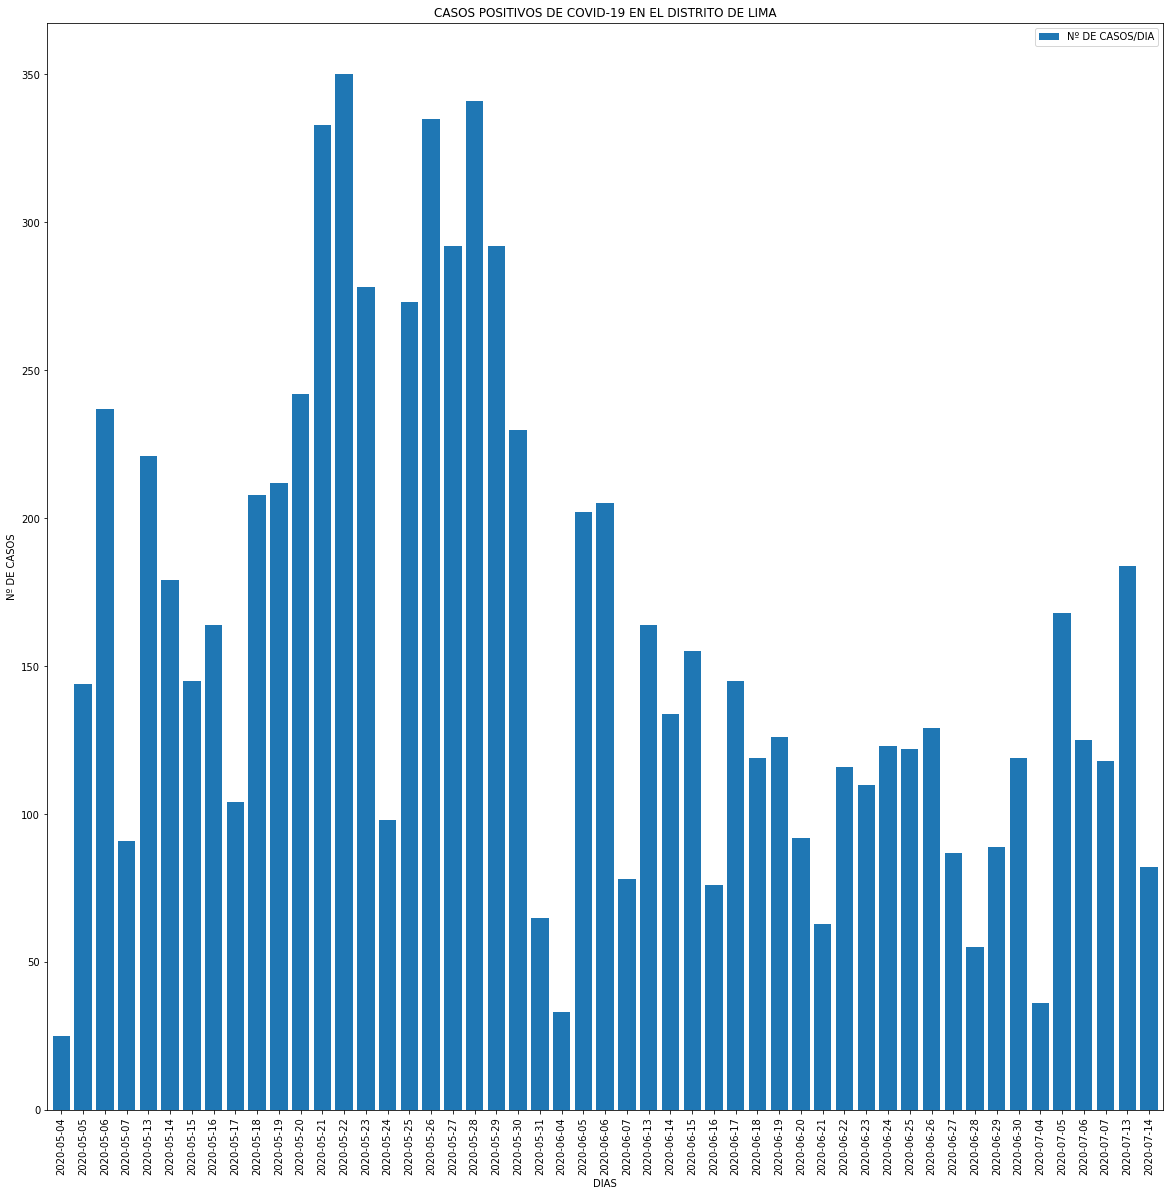

In [170]:
orden.plot(x='FECHA_RESULTADOS', y='Nº DE CASOS/DIA', kind='bar', width=0.8,figsize=(20,20)) 
plt.title("CASOS POSITIVOS DE COVID-19 EN EL DISTRITO DE LIMA") 
plt.xlabel("DIAS")                       
plt.ylabel("Nº DE CASOS") 
plt.show()

Se puede apreciar que los casos en el distrito de **Lima** aumentan desde el 05/05/2020 y su pico mas alto se dio el 22/05/2020 con 350 casos y la fecha que hay menos casos es el 04/05/2020 con 25 casos; después del 31/05/2020 se hace irregular los casos positivos a COVID-19

### 6. Listar las 10 personas con mas días detectadas hasta su fallecimiento.

In [460]:
df_fall['FECHA_FALLECIMIENTO']=pd.to_datetime(df_fall['FECHA_FALLECIMIENTO'])
df_fall.dtypes

UUID                           object
FECHA_FALLECIMIENTO    datetime64[ns]
EDAD_DECLARADA                  int64
SEXO                           object
FECHA_NAC                      object
DEPARTAMENTO                   object
PROVINCIA                      object
DISTRITO                       object
dtype: object

In [461]:
df_fall['FECHA_NAC']=pd.to_datetime(df_fall['FECHA_NAC'])
df_fall.dtypes

UUID                           object
FECHA_FALLECIMIENTO    datetime64[ns]
EDAD_DECLARADA                  int64
SEXO                           object
FECHA_NAC              datetime64[ns]
DEPARTAMENTO                   object
PROVINCIA                      object
DISTRITO                       object
dtype: object

In [478]:
Dias=df_fall[{'UUID','FECHA_NAC','FECHA_FALLECIMIENTO'}]
Dias

,FECHA_FALLECIMIENTO,UUID,FECHA_NAC
0,2020-04-22,a291428b3f0f74997a60fcd837d43519,1947-07-05
1,2020-04-25,bea9970bcea5a648e970aa9896d6b763,1959-05-29
2,2020-03-05,7c7970dccf5f0ec92543c9fd5a01fde9,1946-03-08
3,2020-03-05,ff4c117718021a7fe79eb45b5462e543,1967-10-07
4,2020-04-23,f7284d7cf0ab559b2f8165e7dca41098,1970-03-29
...,...,...,...
12412,2020-07-14,80aaa7a9fdc3f2af3f847228107b15da,1958-04-26
12413,2020-07-14,ed496abc2b875f8479ef7237310d4726,1941-05-18
12414,2020-07-14,9d1af0ec694a9a6084106e182f5b211f,1931-01-31
12415,2020-07-14,89159b21e09b0df87510a8b71c0d0fe0,1930-11-13


In [535]:
Dias.dropna()

,FECHA_FALLECIMIENTO,UUID,FECHA_NAC,NUMERO DE DIAS DE VIDA AL FALLECER
0,2020-04-22,a291428b3f0f74997a60fcd837d43519,1947-07-05,26590 days
1,2020-04-25,bea9970bcea5a648e970aa9896d6b763,1959-05-29,22247 days
2,2020-03-05,7c7970dccf5f0ec92543c9fd5a01fde9,1946-03-08,27026 days
3,2020-03-05,ff4c117718021a7fe79eb45b5462e543,1967-10-07,19143 days
4,2020-04-23,f7284d7cf0ab559b2f8165e7dca41098,1970-03-29,18288 days
...,...,...,...,...
12412,2020-07-14,80aaa7a9fdc3f2af3f847228107b15da,1958-04-26,22725 days
12413,2020-07-14,ed496abc2b875f8479ef7237310d4726,1941-05-18,28912 days
12414,2020-07-14,9d1af0ec694a9a6084106e182f5b211f,1931-01-31,32672 days
12415,2020-07-14,89159b21e09b0df87510a8b71c0d0fe0,1930-11-13,32751 days


In [563]:
Exac= (Dias['FECHA_FALLECIMIENTO']>= '2020-07-17')
Exac1=Dias.loc[Exac]
Exac1

,FECHA_FALLECIMIENTO,UUID,FECHA_NAC,NUMERO DE DIAS DE VIDA AL FALLECER
85,2020-08-04,bb3b05b0b6502a764b48273039fd8523,NaT,NaT
126,2020-10-04,6b31c8361fb5054113c510ad060aba2b,1957-01-05,23283 days
249,2020-08-05,ed1983626f580b23c0a1f1effdd9d292,1958-01-04,22859 days
251,2020-08-05,d1828a72ac8e660cad04fdfe443953fd,1958-06-23,22689 days
253,2020-08-05,21b75ed6279972750f79672a902bc1ee,1928-07-08,33631 days
...,...,...,...,...
12367,2020-12-06,233a246da930bb9f8c571b187611f7ad,1945-06-03,27580 days
12368,2020-12-06,9dee6d0796b9177c861285f7388e1aee,1930-08-30,32971 days
12369,2020-12-06,b48be0432352ac996445e942cb87ecfe,1946-10-08,27088 days
12370,2020-12-06,2519cfedf590a6724240055027994638,1960-01-24,22232 days


Habian fechas registradas superiores a la fecha actual, por lo cual elimine todos esos datos; además hay valores tipo NaT por lo cual tambien los elimine.

In [564]:
Exac1 =Exac1.dropna(how='any')
Exac1

,FECHA_FALLECIMIENTO,UUID,FECHA_NAC,NUMERO DE DIAS DE VIDA AL FALLECER
126,2020-10-04,6b31c8361fb5054113c510ad060aba2b,1957-01-05,23283 days
249,2020-08-05,ed1983626f580b23c0a1f1effdd9d292,1958-01-04,22859 days
251,2020-08-05,d1828a72ac8e660cad04fdfe443953fd,1958-06-23,22689 days
253,2020-08-05,21b75ed6279972750f79672a902bc1ee,1928-07-08,33631 days
257,2020-08-05,1e963e6459366177311e3a8087e23423,1935-01-07,31257 days
...,...,...,...,...
12367,2020-12-06,233a246da930bb9f8c571b187611f7ad,1945-06-03,27580 days
12368,2020-12-06,9dee6d0796b9177c861285f7388e1aee,1930-08-30,32971 days
12369,2020-12-06,b48be0432352ac996445e942cb87ecfe,1946-10-08,27088 days
12370,2020-12-06,2519cfedf590a6724240055027994638,1960-01-24,22232 days


In [568]:
Exac1['NUMERO DE DIAS DE VIDA AL FALLECER']  = Exac1['FECHA_FALLECIMIENTO'] - Exac1['FECHA_NAC']
Exac1

,FECHA_FALLECIMIENTO,UUID,FECHA_NAC,NUMERO DE DIAS DE VIDA AL FALLECER
126,2020-10-04,6b31c8361fb5054113c510ad060aba2b,1957-01-05,23283 days
249,2020-08-05,ed1983626f580b23c0a1f1effdd9d292,1958-01-04,22859 days
251,2020-08-05,d1828a72ac8e660cad04fdfe443953fd,1958-06-23,22689 days
253,2020-08-05,21b75ed6279972750f79672a902bc1ee,1928-07-08,33631 days
257,2020-08-05,1e963e6459366177311e3a8087e23423,1935-01-07,31257 days
...,...,...,...,...
12367,2020-12-06,233a246da930bb9f8c571b187611f7ad,1945-06-03,27580 days
12368,2020-12-06,9dee6d0796b9177c861285f7388e1aee,1930-08-30,32971 days
12369,2020-12-06,b48be0432352ac996445e942cb87ecfe,1946-10-08,27088 days
12370,2020-12-06,2519cfedf590a6724240055027994638,1960-01-24,22232 days


In [569]:
Exac1['NUMERO DE DIAS DE VIDA AL FALLECER'].sort_values (ascending = [False]).head(10)

12334   35936 days
10510   35800 days
6498    35759 days
10017   35566 days
5156    35321 days
10055   35249 days
5318    35231 days
10565   35222 days
10264   35175 days
10350   34956 days
Name: NUMERO DE DIAS DE VIDA AL FALLECER, dtype: timedelta64[ns]

In [656]:
Exac1.sort_values('NUMERO DE DIAS DE VIDA AL FALLECER', ascending=False).head(10)

,FECHA_FALLECIMIENTO,UUID,FECHA_NAC,NUMERO DE DIAS DE VIDA AL FALLECER
12334,2020-12-06,ade37cdee4d8a2256d892de19b88907d,1922-07-18,35936 days
10510,2020-12-07,fa211487d20b66a4b5be08d19728e990,1922-12-02,35800 days
6498,2020-11-04,f4d965e7a660a5b7da9a9160aa876491,1922-12-10,35759 days
10017,2020-09-06,76eca28de862f2a8a496254c2a2bf8e9,1923-04-23,35566 days
5156,2020-09-07,cf62377c16617834f88b4f2ae79acf5d,1923-12-25,35321 days
10055,2020-09-06,816824ecfb2f5bc3a759177e147d47ef,1924-03-05,35249 days
5318,2020-10-06,038d4aa3d2c9596a510ebeaef2932ec2,1924-04-22,35231 days
10565,2020-12-07,a7fd948416de8a36717e21409c5ed218,1924-07-02,35222 days
10264,2020-10-06,566bf131c6d3bd96b4304ad924335958,1924-06-17,35175 days
10350,2020-11-07,ae78b6c794ca0c656f50c933022f40cd,1925-02-23,34956 days


En la tabla de arriba se puede observar las 10 personas que tuvieron la mayor mayoria de dias de vida en toda la data del MINSA.

### 7. Cual es el promedio de fallecimiento, para la Provincia de HUARAL 

In [498]:
df_Hua=df_fall[{'PROVINCIA','FECHA_FALLECIMIENTO'}]
df_Hua1=df_Hua[df_Hua['PROVINCIA']=='HUARAL']
df_Hua1

,PROVINCIA,FECHA_FALLECIMIENTO
14,HUARAL,2020-01-05
18,HUARAL,2020-04-29
868,HUARAL,2020-03-04
1001,HUARAL,2020-11-04
1435,HUARAL,2020-04-17
...,...,...
12108,HUARAL,2020-07-07
12113,HUARAL,2020-07-07
12116,HUARAL,2020-07-07
12210,HUARAL,2020-11-06


In [571]:
df_Hua1 =df_Hua1.dropna(how='any')
df_Hua1

,PROVINCIA,FECHA_FALLECIMIENTO
14,HUARAL,2020-01-05
18,HUARAL,2020-04-29
868,HUARAL,2020-03-04
1001,HUARAL,2020-11-04
1435,HUARAL,2020-04-17
...,...,...
12108,HUARAL,2020-07-07
12113,HUARAL,2020-07-07
12116,HUARAL,2020-07-07
12210,HUARAL,2020-11-06


In [525]:
mue=df_Hua1['FECHA_FALLECIMIENTO'].value_counts()
mue

2020-06-16    7
2020-06-22    7
2020-08-06    7
2020-05-29    6
2020-05-31    6
             ..
2020-11-04    1
2020-06-05    1
2020-05-05    1
2020-03-04    1
2020-06-14    1
Name: FECHA_FALLECIMIENTO, Length: 62, dtype: int64

In [531]:
mue.head(40)

2020-06-16    7
2020-06-22    7
2020-08-06    7
2020-05-29    6
2020-05-31    6
2020-05-28    6
2020-05-27    5
2020-09-06    5
2020-06-15    5
2020-02-06    5
2020-06-19    5
2020-06-25    5
2020-06-27    5
2020-07-06    4
2020-05-06    4
2020-06-06    4
2020-07-07    4
2020-06-28    4
2020-06-21    4
2020-04-06    4
2020-01-07    3
2020-10-06    3
2020-03-06    3
2020-07-14    3
2020-06-07    3
2020-05-30    3
2020-06-23    3
2020-06-26    2
2020-02-05    2
2020-04-07    2
2020-01-05    2
2020-11-06    2
2020-04-23    2
2020-01-06    2
2020-06-17    2
2020-02-07    2
2020-06-13    2
2020-12-06    2
2020-04-25    1
2020-03-07    1
Name: FECHA_FALLECIMIENTO, dtype: int64

El promedio de casos en la provincia de HUARAL depende de las fechas pero el maximo numero de casos fue 7 y el minimo fue 1

### 8. Cual es el promedio estimado, de fallecimiento de las personas que tienen 33 años de edad y es del distrito de FERREÑAFE, Lambayeque. 

In [574]:
df_Ferr=df_fall[{'PROVINCIA','EDAD_DECLARADA','DEPARTAMENTO','DISTRITO'}]
df_Ferr1=df_Ferr[df_Ferr['DISTRITO']=='FERREÑAFE']
df_Ferr1

,PROVINCIA,EDAD_DECLARADA,DISTRITO,DEPARTAMENTO
58,FERREÑAFE,78,FERREÑAFE,LAMBAYEQUE
59,FERREÑAFE,74,FERREÑAFE,LAMBAYEQUE
263,NaN,71,FERREÑAFE,LAMBAYEQUE
820,FERREÑAFE,50,FERREÑAFE,LAMBAYEQUE
914,FERREÑAFE,52,FERREÑAFE,LAMBAYEQUE
952,FERREÑAFE,57,FERREÑAFE,LAMBAYEQUE
957,FERREÑAFE,58,FERREÑAFE,LAMBAYEQUE
961,FERREÑAFE,69,FERREÑAFE,LAMBAYEQUE
962,FERREÑAFE,57,FERREÑAFE,LAMBAYEQUE
964,FERREÑAFE,58,FERREÑAFE,LAMBAYEQUE


In [575]:
df_Ferr2 =df_Ferr1.dropna(how='any')
df_Ferr2

,PROVINCIA,EDAD_DECLARADA,DISTRITO,DEPARTAMENTO
58,FERREÑAFE,78,FERREÑAFE,LAMBAYEQUE
59,FERREÑAFE,74,FERREÑAFE,LAMBAYEQUE
820,FERREÑAFE,50,FERREÑAFE,LAMBAYEQUE
914,FERREÑAFE,52,FERREÑAFE,LAMBAYEQUE
952,FERREÑAFE,57,FERREÑAFE,LAMBAYEQUE
957,FERREÑAFE,58,FERREÑAFE,LAMBAYEQUE
961,FERREÑAFE,69,FERREÑAFE,LAMBAYEQUE
962,FERREÑAFE,57,FERREÑAFE,LAMBAYEQUE
964,FERREÑAFE,58,FERREÑAFE,LAMBAYEQUE
969,FERREÑAFE,70,FERREÑAFE,LAMBAYEQUE


In [584]:
df_Ferr3=df_Ferr2['EDAD_DECLARADA']== 33
df_Ferr3.count()

44

Primero se borraron todos los datos tipo NaN y NaT. El número de fallecidos de 33 años en el distrito de FERREÑAFE es 44

### 9. Apache Spark, Que es un RDD.

<p style='text-align: justify;'>  
Un **RDD (Resilient Distributed Datasets)**, según Spark, se define como una colección de elementos que es tolerante a fallos y que es capaz de operar en paralelo.</p>
<p style='text-align: justify;'> 
Es importante recalcar el tema de que sea capaz de operar en paralelo, porque es la clave o la filosofía básica de Apache Spark.</p>

*Los RDDs tienen como características principales las siguientes:*
<p style='text-align: justify;'> 
1.- Es la principal abstracción de datos, el tipo de dato básico que tiene Apache Spark.</p>
<p style='text-align: justify;'> 
2.- Los RDD están particionados en los distintos nodos del clúster, ya que Apache Spark se suele instalar en un clúster o conjunto de máquinas, por lo que esos RRDs se encuentran distribuidos sobre esas máquinas. Con ello se consigue la tolerancia a fallos, porque si falla una máquina tenemos el fichero en otras máquinas.</p>
<p style='text-align: justify;'> 
3.- Se suelen crear a partir de un fichero del HDFS, el sistema de ficheros distribuidos de Hadoop.</p>
<p style='text-align: justify;'> 
4.- Usan la evaluación perezosa, que consiste en que todas las transformaciones que vayamos haciendo a los RDDs se van a ir almacenando en un DAG y no se van a resolver hasta que no quede más remedio, hasta que la herramienta esté obligada a realizarlas. Esta evaluación perezosa tiene una ventaja y un inconveniente, la primera es que ganamos tiempo, y el inconveniente es que si falla, no lo vamos a ver hasta que se resuelva el grafo completo.</p>

### 10. Cuales son los componentes de Apache Spark.

Componentes

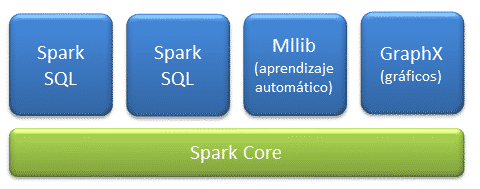

*Los componentes principales que conforman el framework son estos:*

**A.- Spark Core:** Es la base o conjunto de librerías donde se apoya el resto de módulos. Es el núcleo del framework.

**B.- Spark SQL:** Es el módulo para el procesamiento de datos estructurados y semi-estructurados. Con este módulo vamos a poder transformar y realizar operaciones sobre los RDD o los dataframes. Está pensado exclusivamente para el tratamiento de los datos.

**C.- Spark Streaming:** Es el que permite la ingesta de datos en tiempo real. Si tenemos una fuente, por ejemplo Kafka o Twitter, con este módulo podemos ingestar los datos de esa fuente y volcarlos a un destino. Entre la ingesta de datos y su volcado posterior, podemos tener una serie de transformaciones.

**D.- Spark MLLib:** Es una librería muy completa que contiene numerosos algoritmos de Machine Learning, tanto de clusterización, clasificación, regresión, etc. Nos permite, de una forma amigable, poder utilizar algoritmos de Machine Learning.

**E.- Spark Graph:** Permite el procesamiento de grafos (DAG). No permite pintar grafos, sino que permite crear operaciones con grafos, con sus nodos y aristas, e ir realizando operaciones.
